# An analysis of the State of the Union speeches - Part 1

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import shelve

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (10, 6)

This is a "hollowed out" version of my complete analysis, leaving you a few results to check your progress:

*** The original txt file is quite larger, so we decided to break it down to smaller pieces, each piece contain only one speech. In this way, we can manipulate the data more efficently. For the content of speech, we split the txt file using '* * *' as boundary. We store the content of the speech in a list, called "speeches".***

***To render the specific results for this question. We only need a segment of the the origin txt file. We skip the firt 9 rows of the txt file, since they are just some unrelated information. Then, we decied to the take data from row 10 to row 237 (total of 227 rows). These rows contain the information of the name of pressident, title of speech , and date of the speech. We read them in as csv file, and then converted it to DataFrame, which contain  presidents and addresses/dates. As a result, we could reproduced the specific results givien by the professor***





In [12]:
# Addresses is a dataframe with all the basic data for the addresses:
from pandas import DataFrame
import time

with open('data/stateoftheunion1790-2017.txt','r') as f:
    all=f.read()
    speeches=all.split('***')
speeches=speeches[1:]   

raw=pd.read_csv('data/stateoftheunion1790-2017.txt',skiprows=9,nrows=227,names=['president','title','date',''],parse_dates=[[2,3]])
addresses=DataFrame({'president':raw['president'],'title':raw['title'],'date':raw['date_']},columns=['president','title','date'])
addresses.head()

,president,title,date
0,George Washington,State of the Union Address,1790-01-08
1,George Washington,State of the Union Address,1790-12-08
2,George Washington,State of the Union Address,1791-10-25
3,George Washington,State of the Union Address,1792-11-06
4,George Washington,State of the Union Address,1793-12-03


Let's take a first look at a high-level summary of what we have so far:

In [9]:
addresses['president'].describe()
# Describe the presidents data

count                         227
unique                         42
top         Franklin D. Roosevelt
freq                           12
Name: president, dtype: object

*** There are total of 227 State of Union address. There are only 42 unqiue address given by individual president, but the sitting presdient is our 45th presdient. After did some reseach, we find out why, and it is really interesting.***


*** There are two presidents who never delivered an Annual Message or State of the Union Address. William Henry Harrison and James Garfield both died before they had the chance to deliver one, Harrison from pneumonia in 1841 and Garfield from an assassin’s bullet in 1881. ***

*** Grover Cleveland stands alone in American history as the only President to serve non-consecutive terms. He was the the 22nd and 24th President of the United States. Due to this non-sonsecutive terms, he addresses only count as 1 unique address. (The inforamtion on second term of Presidnet Grove Cleveland(1893-1897) wasn't include in the txt)***

***FDR war time president***

*** As a result, there are 42 unique address, (45-2-1)= 42 unique address.*** 

***In another word, although the sitting president is our 45th president, there has only been 44 unique presidents in the history. Minus the 2 presdient who didn't deliever address, leave us 42 unique address***


Let's find the dates of the first and last address, and how much time has passed between those:

*** We use this bit of code to determine how much time has passed between those. We devided the total time by 365.25 because we need to take the year of LEAP YEAR into consideration.***

In [25]:
array=addresses['date']
a=((max(array)-min(array))).days/365.25
a

227.13210130047912

Let's see during which months are the speeches most frequently delivered:

In [26]:
# This is a count of the number of addresses delivered on any given month
from datetime import *
import time
import calendar
date=addresses['date']
acounts = date.groupby([date.dt.month]).count().reindex([i for i in range(1,13)], fill_value=0)
acounts = acounts.rename('Address counts')
acounts.index=[calendar.month_name[i] for i in range(1,13)]
acounts

January       75
February      12
March          0
April          0
May            0
June           0
July           0
August         0
September      2
October        3
November      11
December     124
Name: Address counts, dtype: int64

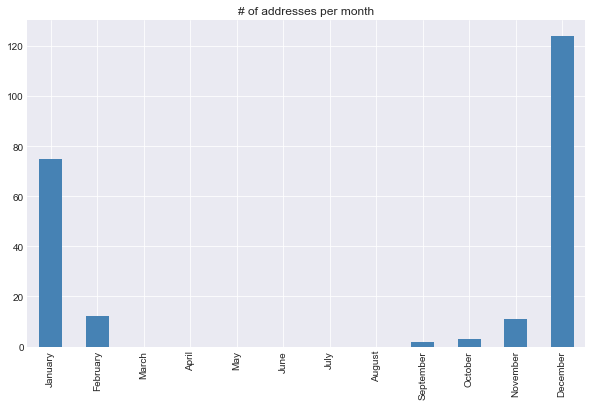

In [32]:
# And this is a plot of these:
acounts.plot(kind='bar',grid=True,title='# of addresses per month',color='steelblue')
plt.savefig('fig/addresses_month.png');

*** We use the previous few blocks to summarize the distribution of speeches and we make a boxplot of the speeches timeline to visualize. ***

***As tradition, the State of Union Addrress is usually about announcing achivment of the past and setting new goals for the futre. Therefore, the address happens mostly at the end of year in Nov and Dec or at the begining of the year, January or Feburary.***


Let's look at the distribution of differences between successive speeches:

Where is the largest gap? We can ask the `ddiff` series for its location:

In [35]:
# this is the index of the largest gap:
from pandas import Series
a=np.diff(addresses['date'])
a=Series(a)
a.index=np.arange(1,len(a)+1)
max_interval=max(a)
def look_up(a):
    for i in np.arange(1,len(a)+1):
        if a[i]==max_interval:
            return i
dgap=look_up(a)
dgap

104

*** The largest gap happpen at bewtenn index 103 and index 104. The full explaination is given below ***

Let's look at the dates around this index:

In [36]:
dates=addresses['date']
dates[dgap-2 : dgap+2]

102   1891-12-09
103   1892-12-06
104   1897-12-06
105   1898-12-05
Name: date, dtype: datetime64[ns]

As well as a plot of these times:

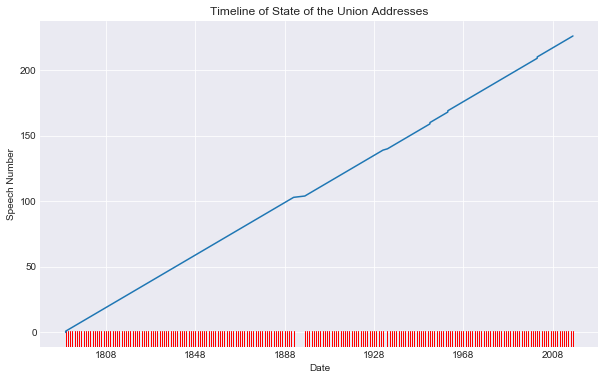

In [37]:
# A plot of the times, along with 'rug' markers on the x axis.
Date=addresses['date'].dt.year
f,axarr=plt.subplots(1,sharex=True)
sns.distplot(Date,rug=True,hist=False,kde=False,color='r')
#sns.rugplot(Date)
axarr.plot(Date,Date.index)
plt.grid()
plt.xlabel('Date')
plt.ylabel('Speech Number')
plt.title('Timeline of State of the Union Addresses')
plt.xticks(np.arange(1808,2009,40))
f.savefig('fig/timeline.png')

What happened at that gap?

*** As I mention before, Grover Cleveland stands alone in American history as the only President to serve non-consecutive terms. This situation creates some confusion for the data set since his inforamtion on second term of Presidnet Grove Cleveland(1893-1897) wasn't include in the txt. ***

***The address of index 103 is the President Benjamin Harrison last address on 1892, and the address of index 104 is Presient William McKinley firest address on 1898. President Gover Cleveland second term is from 1893 to 1897, which is skipped in the data txt. ***

*** This is why there is large gap at that time ***


## Intermediate results

Let's save some intermediate results for further analysis. This lets us work on subsequent notebooks  without rerunning this one.  We use the Pandas HDF5 support for efficient and type-safe serialization of data frames, and the python builtin [shelve](https://docs.python.org/3/library/shelve.html) module for simple Python variables.  We'll create for each notebook variable stores with the notebook number, one for dataframes (`df1.h5`, `df2.h5`, etc.) and one for python variables (`vars1.db`, `vars2.db`, etc.).  These will all go into the `results/` subdirectory.

In [10]:
addresses.to_hdf('results/df1.h5', 'addresses')
with shelve.open('results/vars1') as db:
    db['speeches'] = speeches